# Phase and Delay Measurements
---

In [12]:
import numpy as np
from scipy import signal as sp
from matplotlib import pyplot as plt
import TP03_sub
try:
    %matplotlib widget
except:pass

## 1. Introduction



## 2. Signal generator and Time-doman approach

1. In which direction is the signal shifted for a positive delay? (this corresponds to a choice here, it could have been the other way around)

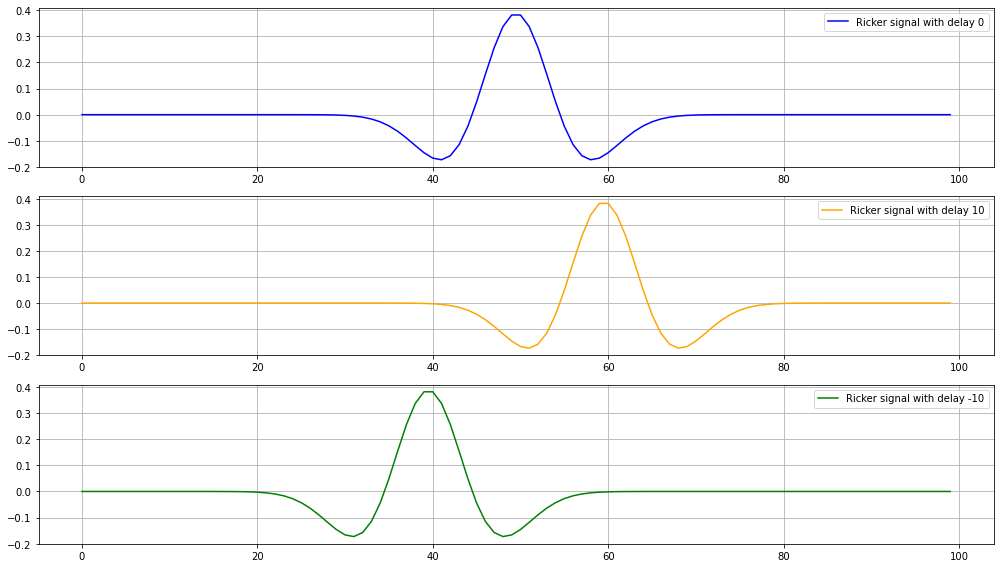

In [13]:
plt.figure(figsize=(14, 8))
plt.subplot(311)
ricker_s = TP03_sub.signal_generator(stype="ricker",delay=0)
plt.plot(ricker_s, label='Ricker signal with delay 0', color='blue')
plt.legend()
plt.tight_layout()
plt.grid(True)

plt.subplot(312)
ricker_s1 = TP03_sub.signal_generator(stype="ricker",delay=10)
plt.plot(ricker_s1, label='Ricker signal with delay 10', color='orange')
plt.legend()
plt.tight_layout()
plt.grid(True)

plt.subplot(313)
ricker_s2 = TP03_sub.signal_generator(stype="ricker",delay=-10)
plt.plot(ricker_s2, label='Ricker signal with delay -10', color='green')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


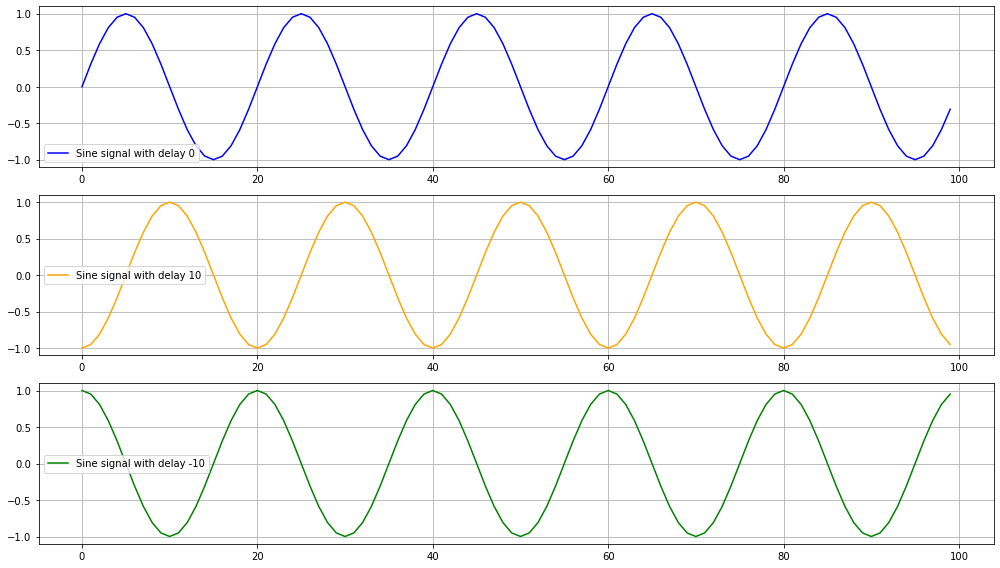

In [14]:
plt.figure(figsize=(14, 8))
plt.subplot(311)
sin_s = TP03_sub.signal_generator(stype="sin",delay=0)
plt.plot(sin_s, label='Sine signal with delay 0', color='blue')
plt.legend()
plt.tight_layout()
plt.grid(True)

plt.subplot(312)
sin_s1 = TP03_sub.signal_generator(stype="sin",delay=5)
plt.plot(sin_s1, label='Sine signal with delay 10', color='orange')
plt.legend()
plt.tight_layout()
plt.grid(True)

plt.subplot(313)
sin_s2 = TP03_sub.signal_generator(stype="sin",delay=-5)
plt.plot(sin_s2, label='Sine signal with delay -10', color='green')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

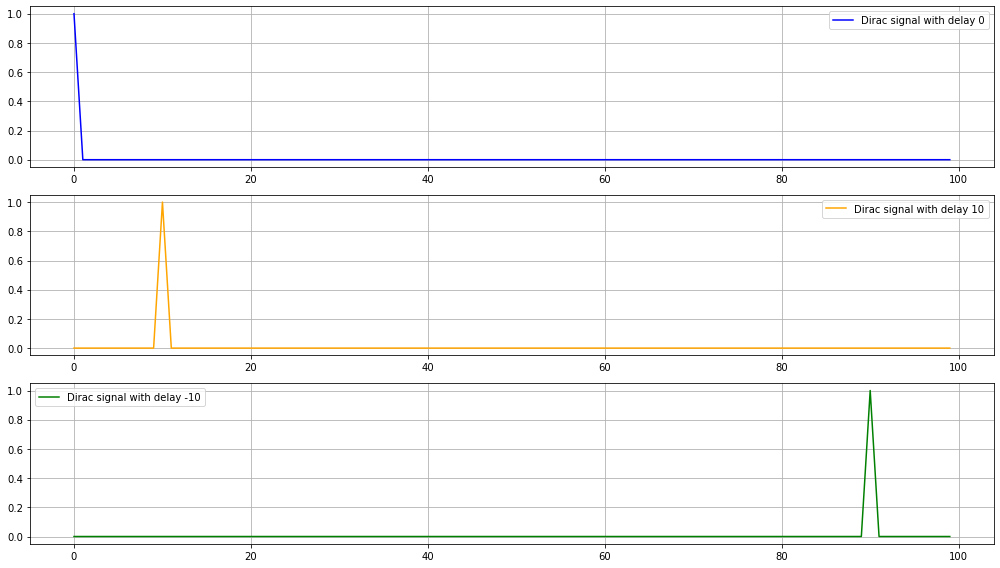

In [15]:
plt.figure(figsize=(14, 8))
plt.subplot(311)
dirac_s = TP03_sub.signal_generator(stype="dirac",delay=0)
plt.plot(dirac_s, label='Dirac signal with delay 0', color='blue')
plt.legend()
plt.tight_layout()
plt.grid(True)

plt.subplot(312)
dirac_s1 = TP03_sub.signal_generator(stype="dirac",delay=10)
plt.plot(dirac_s1, label='Dirac signal with delay 10', color='orange')
plt.legend()
plt.tight_layout()
plt.grid(True)

plt.subplot(313)
dirac_s2 = TP03_sub.signal_generator(stype="dirac",delay=-10)
plt.plot(dirac_s2, label='Dirac signal with delay -10', color='green')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

A positive delay shifts the signal to the right of the time axis (The x-axis).<br>
A negative delay shifts the signal to the left. It gets closer to the origin the greater the negative delay is.<br>
However, for the dirac signal, we see that even with a negative delay, the peak shifts to the right.
This may be due to some convention adopted in the program coded here.

2. We will need two signals to measure a difference. Create and plot two 'sin' functions with a period of 20 samples (which corresponds to its default value). The second sin must have a delay of 5 samples compared to the first one. Again, by default, signals have a length of 100 samples.

    **note**: keep `stype='sin'` up to the end of this section

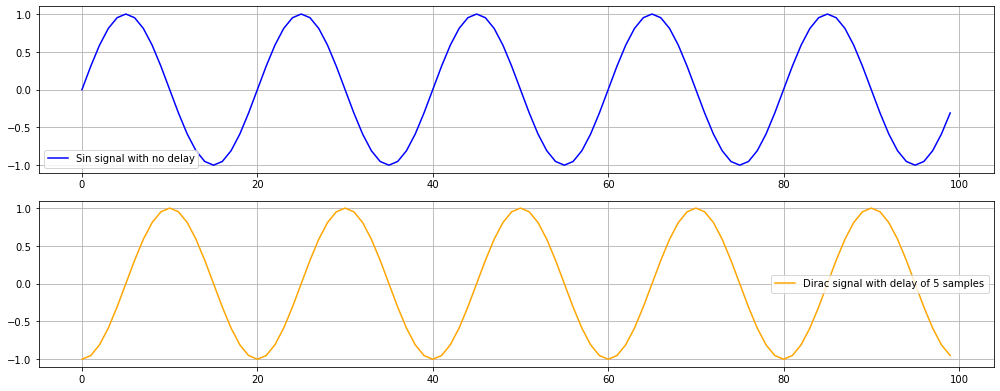

In [27]:
s1 = TP03_sub.signal_generator(stype="sin",delay=0,f0=1/20)
s2 = TP03_sub.signal_generator(stype="sin",delay=5,f0=1/20)

plt.figure(figsize=(14, 8))

plt.subplot(311)
plt.plot(s1, label='Sin signal with no delay', color='blue')
plt.legend()
plt.tight_layout()
plt.grid(True)

plt.subplot(312)
plt.plot(s2, label='Dirac signal with delay of 5 samples', color='orange')
plt.legend()
plt.tight_layout()
plt.grid(True)

3. copy-past the previous cell bellow and compute the correlation between s1 and s2 (using `np.correlate()` with `mode='full`). The function `TP03_sub.make_plts()` can now be use to plot the most nessecary figures for the practical (s1, s2 and c for now, $\square$). `TP03_sub.make_plts()` also returns a measure of the time delay extracted from the correlation function. By looking at the `TP03_sub.measure_delay_from_xcorr()`, explain quikly how did we implement this measure. The red dot of the correlogram correspond to the max value.

delay from t-domain c: -5.000000


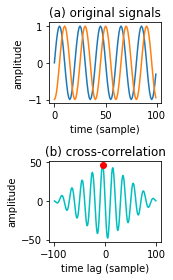

In [28]:
s1 = TP03_sub.signal_generator(stype="sin",delay=0,f0=1/20)
s2 = TP03_sub.signal_generator(stype="sin",delay=5,f0=1/20)
c  = np.correlate(s1, s2, mode='full')

# plot using TP03_sub.make_plts()
TP03_sub.make_plts(s1,s2,c)

1. The function above takes c as a parameter. c is the correlation of the signals s1 and s1.
2. lag is a an np array of the values by which the correlated signal lag from the time origin.
3. ind stores the maximum value from the correlation of the signals s1 and s2.
4. dt stores the value of the sample at which this maximum correlation value occurs.This also corresponds to the delay from the time-domain.
5. We know that the correlation function tells us to what degree the 2 signals differ from each other. Since s1 and s2 are fundamentally the same signals with only the difference of a delay, the function measure_delay_from_xcorr(c) extracts the value of the maximum difference between the two and returns that value as the time delay (dt)

From the CMS,
![correlation](correlation.png) 

From that we know that whenever we have a positive time delay, in this case +5, this leads to a negative correlation function.
delay from t-domain c: -5.000000 is hence a coherent output.

4. Experiment different (integer) delay for s2. For intance: 5, 10, 11, 18, 20, 21,... what is going on? (remember that by default, the sin function has a fundamental period of 20 sample). Can you comment on the limitations of considering a time-delay for a periodic signal?

delay from t-domain c: -5.000000
delay from t-domain c: -10.000000
delay from t-domain c: 9.000000
delay from t-domain c: 2.000000
delay from t-domain c: 0.000000
delay from t-domain c: -2.000000
delay from t-domain c: -5.000000


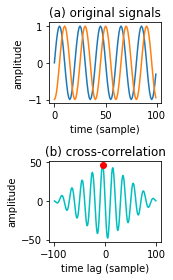

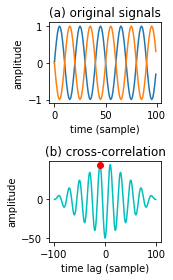

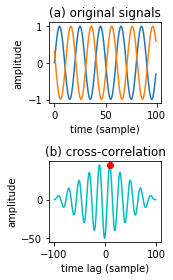

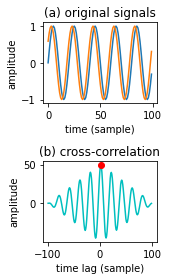

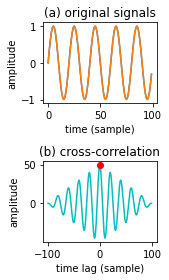

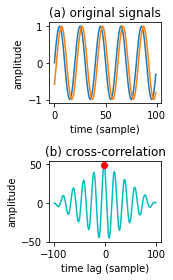

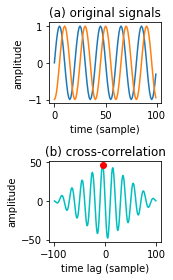

In [29]:
x = [5,10,11,18,20,22,25]
s1 = TP03_sub.signal_generator(stype="sin",delay=0)
for i in x:
    s2 = TP03_sub.signal_generator(stype="sin",delay=i)
    c  = np.correlate(s1, s2, mode='full')
    TP03_sub.make_plts(s1,s2,c)

Above is the data we get from the TP03_sub.measure_delay_from_xcorr().

We can see that the time delay for the first 2 delay values are as we expected.<br>
Each period has 20 samples.<br>
For a delay of 18 samples, this causes the signal s2 to shift to the right such that it nears the start of another period in the signal s1.<br>
This hence becomes equivalent to the signal s2 having a delay of -2. This is why we get a positive output from the correlate function<br>
as explained in the previous part.<br>
The same can be explained for the the time delay obtained with correlating with a signal of delay 11 samples.<br>
For s2 with a delay of 20, s2 realigns witgh s1, causing the cross-relation function to detect no differences between the two signals.<br>
Hence we observe a delay from t-domain c of 0.<br>
Beyond a delay of 20 samples, this causes the delay to exceed one period.<br>
Hence this causes the delays to wrap around and the whole process repeats. <br>
A delay of 22 is equivalent to the signal s2 having a delay of 2.<br>
We hence get a negative time correlation function again due to a delay of +2.<br>
The same explanation goes for a delay of 25. 

5. Remembering that the sampling rate is here 1 sample. Try a different real values for the delayed signal s2 ($\square$). What is the main limitation of using a time domain correlation function for measuring a delay?

delay from t-domain c: -1.000000
delay from t-domain c: -1.000000
delay from t-domain c: -11.000000
delay from t-domain c: -1.000000
delay from t-domain c: 99.000000
delay from t-domain c: -1.000000
delay from t-domain c: 99.000000


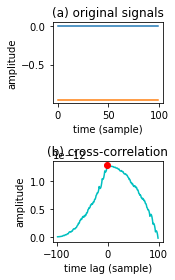

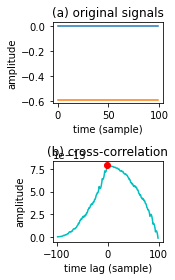

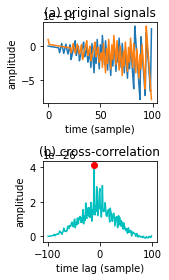

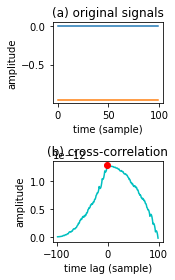

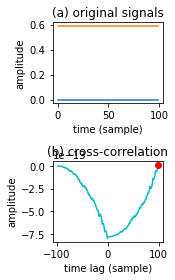

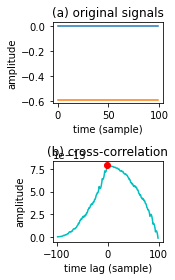

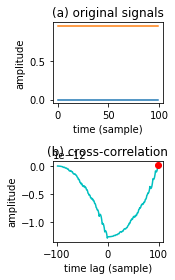

In [30]:
x = [5.3,10.1,11,18.2,20.6,22.1,25.8]
s1 = TP03_sub.signal_generator(stype="sin",delay=0,f0=1)

for i in x:
    s2 = TP03_sub.signal_generator(stype="sin",delay=i,f0=1)
    c  = np.correlate(s1, s2, mode='full')
    TP03_sub.make_plts(s1,s2,c)


Using real values with the domain correlation function does not provide for accurate outputs. <br>
Here in part 5, we are using only one sample to test the function with real values.<br>
Even with just one sample, we can see that the cross-correlation graphs obtained are not very coherent.<br>
This may be due to approximations made by the program when calculating the cross-correlation values. <br>
The program may even approximate the delay it takes as a parameter, giving inaccurate results. <br>
If we use non-discrete values for the time delay over longer samples,the approxiations done by the program will become more significant, providing a greatly compromised result.

6. (bonus) could you imagine some ways to improve this time-domain approach? exaplin in a few words. (remember that everything is based on the determination of the location of the maximum of the correlation c). You can even try to implement...($\blacksquare$)

In the previous TP, we used the function for zero padding.
Oversampling in the time domain is equivalent to adding null samples (’zeros’) between the each
periodic spectrum :
the operation is usually referred as zero padding. (From lecture notes)<br>
Using this function can make the approximations made when using real values less significant.

## 3. Comparing time and frequency domain approach

delay from t-domain c: -5.000000
delay from f-domain phase difference: -5.500000
delay from f-domain cross-spectrum: -5.500000


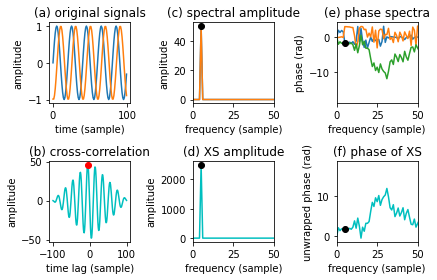

In [31]:
s1 = TP03_sub.signal_generator(stype="sin",delay=0)
s2 = TP03_sub.signal_generator(stype="sin",delay=5.5)
c  = np.correlate(s1, s2, mode='full')
S1 = np.fft.fft(s1)
S2 = np.fft.fft(s2)
C  = S1*np.conj(S2)
TP03_sub.make_plts(s1,s2,c,S1,S2,C)

2. Comment the previous result: explain in a few words, what do you see on both the amplitude and phase spectra in the case of simple sin functions. Could you express the link between the differential phase spectrum $\Delta \phi$ and the time-delay $\Delta t$ ($\Delta t = ?$ as a function of $\Delta \phi$). By zooming on the black dot of one of the phase panel, estimate $\Delta t$ numerically. (see `TP03_sub.measure_delay_from_phase()` for details)

In [32]:
phase_estimate = -2  # visually from zooming onto previous plots
f0 = np.argmax(np.abs(C)) # fundamental frequency of the oscillation
print(f0)
#Δ𝑡 = Δ𝜙 / (2πf0)
N  = len(s1) # length of the signal
delta_t=(phase_estimate/(2*np.pi*f0))  * N
print(delta_t)
# positive Time delay of of 6 s as the time delay from cross-correlation function is negative

5
-6.366197723675813


3. Comparing two dirac functions ($\square$). Set the delay to 0 for s1 and experiment different value for s2 (1,2,10,55,75...). What is going on when s2 is delayed by more than half of its length? What is the main difference between these cases and the previous one with sin functions?

delay from t-domain c: -1.000000
delay from f-domain phase difference: -1.000000
delay from f-domain cross-spectrum: -1.000000
delay from t-domain c: -2.000000
delay from f-domain phase difference: -2.000000
delay from f-domain cross-spectrum: -2.000000
delay from t-domain c: -10.000000
delay from f-domain phase difference: 10.000000
delay from f-domain cross-spectrum: 10.000000
delay from t-domain c: 5.000000
delay from f-domain phase difference: 5.000000
delay from f-domain cross-spectrum: 5.000000
delay from t-domain c: 5.000000
delay from f-domain phase difference: 5.000000
delay from f-domain cross-spectrum: 5.000000


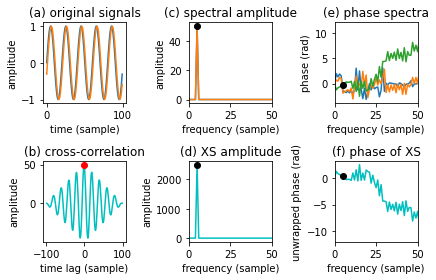

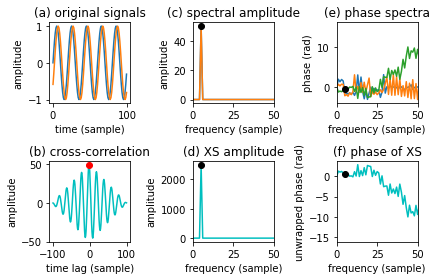

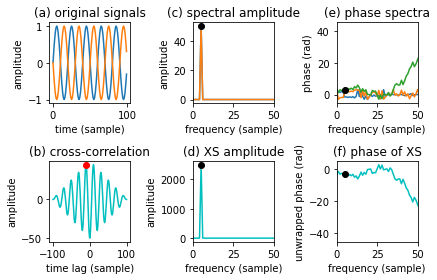

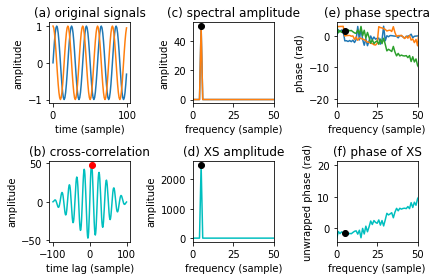

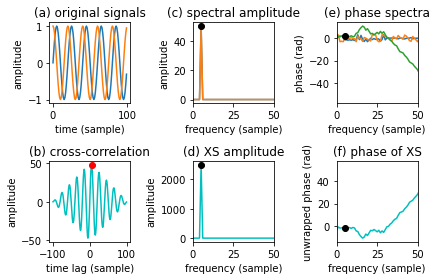

In [33]:
s1 = TP03_sub.signal_generator(stype="sin",delay=0)
x= [1,2,10,55,75]
for val in x:
    s2 = TP03_sub.signal_generator(stype="sin",delay=val)
    c  = np.correlate(s1, s2, mode='full')
    S1 = np.fft.fft(s1)
    S2 = np.fft.fft(s2)
    C  = S1*np.conj(S2)
    TP03_sub.make_plts(s1,s2,c,S1,S2,C)
    

delay from t-domain c: -1.000000
delay from f-domain phase difference: -1.000000
delay from f-domain cross-spectrum: -1.000000
delay from t-domain c: -2.000000
delay from f-domain phase difference: -2.000000
delay from f-domain cross-spectrum: -2.000000
delay from t-domain c: -10.000000
delay from f-domain phase difference: -10.000000
delay from f-domain cross-spectrum: -10.000000
delay from t-domain c: -55.000000
delay from f-domain phase difference: 45.000000
delay from f-domain cross-spectrum: 45.000000
delay from t-domain c: -75.000000
delay from f-domain phase difference: 25.000000
delay from f-domain cross-spectrum: 25.000000


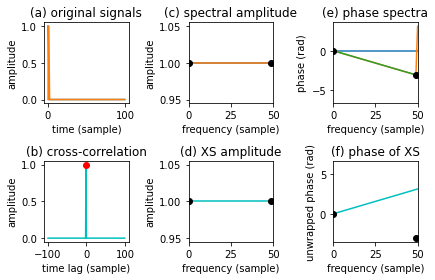

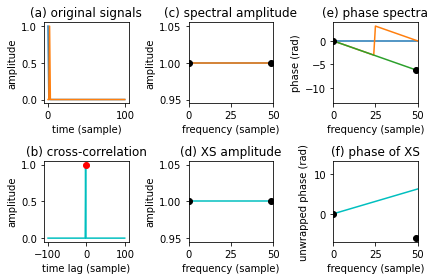

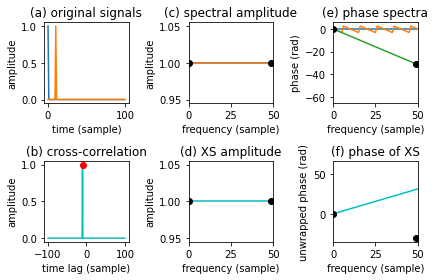

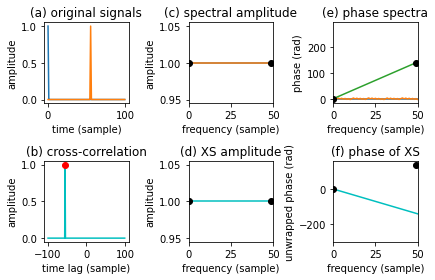

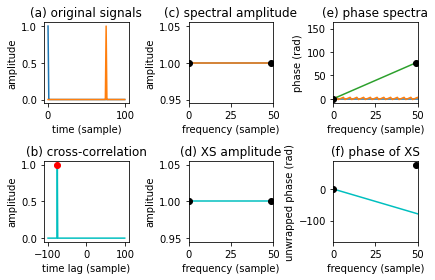

In [34]:
s1 = TP03_sub.signal_generator(stype="dirac",delay=0)
x= [1,2,10,55,75]
for val in x:
    s2 = TP03_sub.signal_generator(stype="dirac",delay=val)
    c  = np.correlate(s1, s2, mode='full')
    S1 = np.fft.fft(s1)
    S2 = np.fft.fft(s2)
    C  = S1*np.conj(S2)
    TP03_sub.make_plts(s1,s2,c,S1,S2,C)
    

The dirac function is not a  periodic function unlike the sin function.<br>
So it does not cause the time delays to wrap when it exceeds half its length.<br>
So, when using the cross-correlation function we still get the accurate value for the delay.
Unlike with the sine function, there are no 'energetic peaks'.
Instead, looking at the XS amplitude, the energy is the same

4. Now comparing two ricker functions ($\square$).

delay from t-domain c: -1.000000
delay from f-domain phase difference: -1.000000
delay from f-domain cross-spectrum: -1.000000
delay from t-domain c: -2.000000
delay from f-domain phase difference: -2.000000
delay from f-domain cross-spectrum: -2.000000
delay from t-domain c: -10.000000
delay from f-domain phase difference: -10.000000
delay from f-domain cross-spectrum: -10.000000
delay from t-domain c: 45.000000
delay from f-domain phase difference: 45.000000
delay from f-domain cross-spectrum: 45.000000
delay from t-domain c: 25.000000
delay from f-domain phase difference: 25.000000
delay from f-domain cross-spectrum: 25.000000


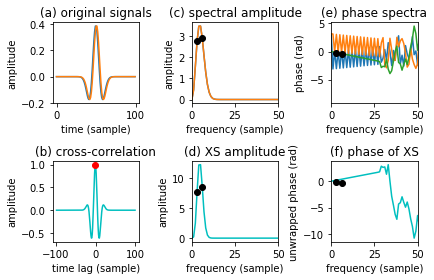

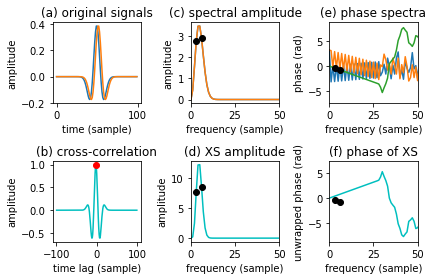

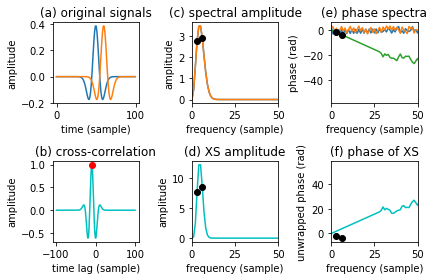

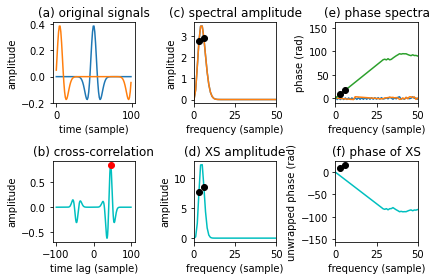

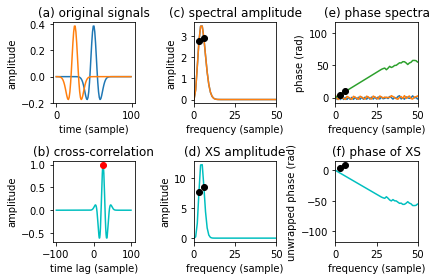

In [35]:
s1 = TP03_sub.signal_generator(stype="ricker",delay=0)
x= [1,2,10,55,75]
for val in x:
    s2 = TP03_sub.signal_generator(stype="ricker",delay=val)
    c  = np.correlate(s1, s2, mode='full')
    S1 = np.fft.fft(s1)
    S2 = np.fft.fft(s2)
    C  = S1*np.conj(S2)
    TP03_sub.make_plts(s1,s2,c,S1,S2,C)

5. Repeat the same experiment as before adding some random noise to the two signals, by simply passing a `noise_lvl` value to `TP03_sub.signal_generator()`. Try `noise_lvl=0.05` and higher values up to 1 ($\square$). Comment on what you see. What is the problem when the noise level is growing?

delay from t-domain c: -5.000000
delay from f-domain phase difference: 15.001157
delay from f-domain cross-spectrum: 15.001157
delay from t-domain c: -5.000000
delay from f-domain phase difference: 15.001841
delay from f-domain cross-spectrum: 15.001841
delay from t-domain c: -5.000000
delay from f-domain phase difference: -4.990122
delay from f-domain cross-spectrum: -4.990122
delay from t-domain c: -5.000000
delay from f-domain phase difference: 34.996201
delay from f-domain cross-spectrum: 34.996201
delay from t-domain c: -5.000000
delay from f-domain phase difference: -5.004304
delay from f-domain cross-spectrum: -5.004304


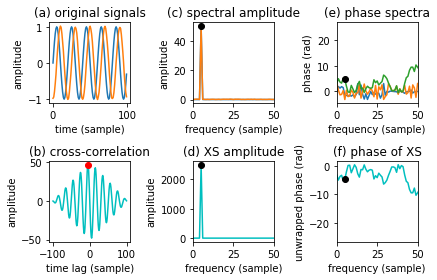

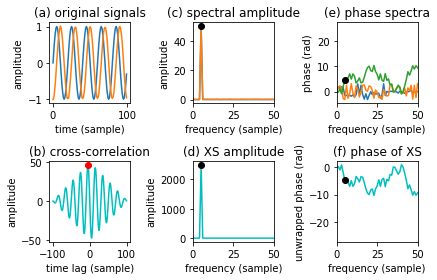

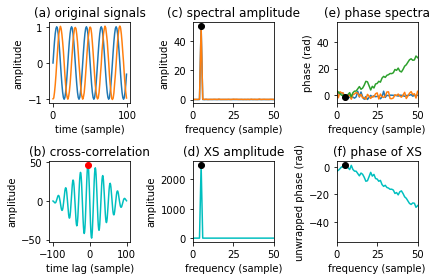

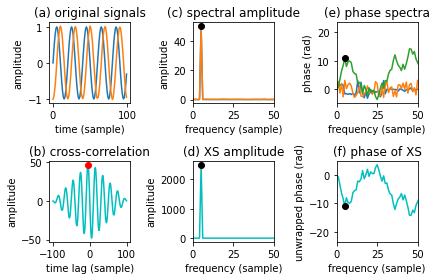

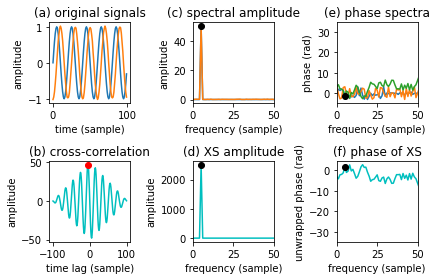

In [36]:
noise_lvl = [0.03, 0.05, 0.07, 0.08, 1.00]
s1 = TP03_sub.signal_generator(stype="sin",delay=0,noise_lvl=0)
for val in x:
    s2 = TP03_sub.signal_generator(stype="sin",delay=5,noise_lvl=0.05)
    c  = np.correlate(s1, s2, mode='full')
    S1 = np.fft.fft(s1)
    S2 = np.fft.fft(s2)
    C  = S1*np.conj(S2)
    TP03_sub.make_plts(s1,s2,c,S1,S2,C)

As the sound level increases, the accuracy of the cross-relation function outputs decreases.<br>
The cross-relation function's ability to spot similarities between the two signals decreases.<br>
The central peak used in the cross-correlation function becomes more compromised as noise increases.<br>
This leads to highly inaccurate results.

6. Applying a simple offset to the phase of S2. What methos seems the most robust when one of the two signal experienced such a distortion?

delay from t-domain c: 5.000000
delay from f-domain phase difference: 5.000000
delay from f-domain cross-spectrum: 5.000000
delay from t-domain c: -10.000000
delay from f-domain phase difference: 10.000000
delay from f-domain cross-spectrum: 10.000000
delay from t-domain c: -7.000000
delay from f-domain phase difference: -7.500000
delay from f-domain cross-spectrum: -7.500000


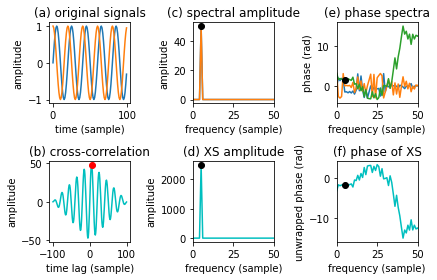

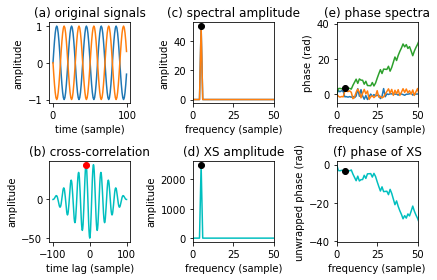

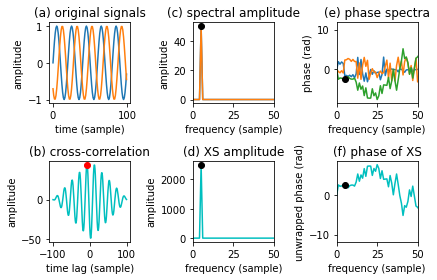

In [37]:
phase_off=[np.pi,(np.pi/2),(np.pi/4)]
s1 = TP03_sub.signal_generator(stype="sin",delay=0)
for val in phase_off:
    s2 = TP03_sub.signal_generator(stype="sin",delay=5,phase_o=val)
    c  = np.correlate(s1, s2, mode='full')
    S1 = np.fft.fft(s1)
    S2 = np.fft.fft(s2)
    C  = S1*np.conj(S2)
    TP03_sub.make_plts(s1,s2,c,S1,S2,C)

$\color{blue}{\text{The phase spectra observed is very distorted.}}$

7. Propose an implementation ($\blacksquare$) for the 'case 3' of the `TP03_sub.measure_delay_from_phase()`. See for instance https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html#numpy.linalg.lstsq

In [26]:
def measure_delay_from_phase(phase,freq,slen,linr=False):
    # compute a delay from the phase spectrum information
    # case 1: a single valid value ("sin") => dt = phi / (2 pi freq)
    # case 2: a range of valid values => dt = D_phi / (2 pi D_freq)
    # case 3: a range of valid values from linear regression (if linr==True)
    # case 4:  phase is empty ... no delay to compute
        if len(freq)==1:
            return phase[freq]*slen/(2*np.pi*freq)
        elif len(freq)>1 and not linr:
            return (phase[freq[-1]]-phase[freq[0]])*slen/(2*np.pi*(freq[-1]-freq[0]))
        elif len(freq)>1 and linr:
            #y=mx+c
            x_axis = np.vstack([freq, np.ones(len(freq))]).T
            gradient, y_intercept = np.linalg.lstsq(x_axis, phase[freq], rcond=None)[0]
            return -y_intercept / gradient
        else:
            return np.NAN